# ***Assignment 7***

***Output across 'C' in a series R-C circuit***

In [48]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()
s,R,C,Vi,w,z = sp.symbols('s R C Vi w z')
R = 47000                   ##### R = 47Kohm
C = 47*10**(-9)             ### C = 47 nF
H = 1/(R*s*C + 1)
print('Transfer Function H(s) = ')
display(H)
cutoff = 1/2/np.pi/R/C
print('\n\nCutoff freq [Hz] : ' , cutoff)
print('Output voltage at f= 100000 Hz :' , 10*abs(H.subs([(s,1j*2*np.pi*10000)])))
print('Output Voltage at f= 100 Hz :' , 10*abs(H.subs([(s,1j*2*np.pi*100)])))

Transfer Function H(s) = 




Cutoff freq [Hz] :  72.04841244540305
Output voltage at f= 100000 Hz : 0.0720465425111200
Output Voltage at f= 100 Hz : 5.84563385192855


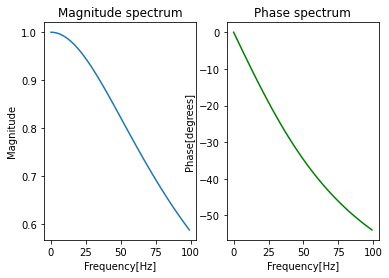

In [ ]:
#####Magnitude and Phase spectrum###
f = np.arange(100)
s1 = 1j * f*2*np.pi
tf = 1/(R*s1*C + 1)
plt.subplot(121)
plt.plot(f,abs(tf))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(122)
plt.plot(np.angle(tf)*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.show()

*The spectrum clearly shows that the behaviour  of this filter is of Low Pass as it filtersout the high frequency components.*

***Output across 'C' in a series R-C circuit***

In [59]:
H2 = s*C*R/(R*s*C + 1)
print('Transfer Function H(s) = ')
display(H2)
cutoff2 = 1/2/np.pi/R/C
print('\n\nCutoff freq [Hz] : ' , cutoff2)
print('Output voltage at f= 100000 Hz :' , 10*abs(H2.subs([(s,1j*2*np.pi*10000)])))
print('Output Voltage at f= 10 Hz :' , 10*abs(H2.subs([(s,1j*2*np.pi*10)])))

Transfer Function H(s) = 




Cutoff freq [Hz] :  72.04841244540305
Output voltage at f= 100000 Hz : 9.99974046141759
Output Voltage at f= 10 Hz : 1.37477680801843


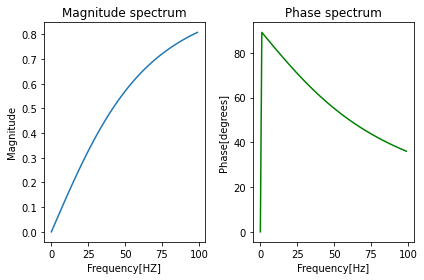

In [ ]:
#####Magnitude and Phase spectrum###
f = np.arange(100)
tf = s1*C*R/(R*s1*C + 1)
plt.subplot(121)
plt.plot(f,abs(tf))
plt.xlabel('Frequency[HZ]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(122)
plt.plot(np.angle(tf)*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

*This filter rejects low frequencies and accepts higher ones, Hence the circuit forms a High pass filter.*

***Second Order Low Pass Filter***

Impulse response :


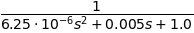


Corner frequency [Hz] :  63.66197723675813


In [62]:
R = 50000
C = 50*10**(-9)
tf3 = 1 /(1j*w*R*C + 1)**2
den = sp.poly((s*R*C + 1)**2)
H3 = 1/den
cutoff3 = 1/2/np.pi/R/C
print('Impulse response :' , )
display(H3)
print('\nCorner frequency [Hz] : ',cutoff3)

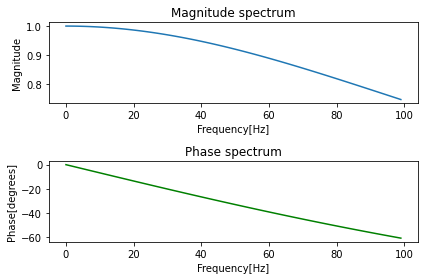

In [ ]:
tf3 = 1 /(s*R*C + 1)**2
f = np.arange(100)
s = 1j * f*2*np.pi
plt.subplot(211)
plt.plot(f,abs(tf3))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.angle(tf3)*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

***BAND PASS FILTER DESIGN***


 "C" value for high pass : 7.957747154594767e-09

 "C" value for low pass : 2.6525823848649227e-10
Transfer function of Band pass fiter :



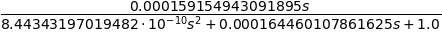

In [ ]:
R = 20000
fh = 30000
fl = 1000
ch = 1/(2*np.pi*fl*R)
print('\n "C" value for high pass :' , ch)
cl = 1/(2*np.pi*fh*R)
print('\n "C" value for low pass :' , cl)
den = sp.poly((s*R*ch +1 )*(s*R*cl + 1))
H4 = s*R*ch/den
print('Transfer function of Band pass fiter :\n')
display(H4)

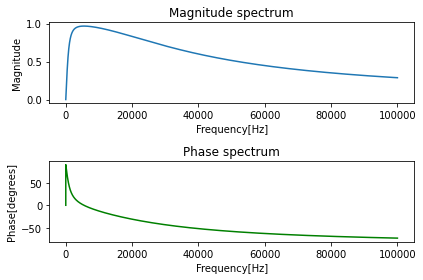

In [ ]:
f = np.arange(100000)
s1 = 1j * f*2*np.pi
tf4 = s1*R*ch/((s1*R*ch +1 )*(s1*R*cl + 1))
plt.subplot(211)
plt.plot(f,abs(tf4))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.angle(tf4)*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

***DIGITAL FILTERS***

*The first fiter given in the Problem is well known boxcar filter of 1-Tap*

**y[n] = x[n] + x[n-1]**

In [ ]:
def boxcar(sgnl):
  y=[sgnl[0]]
  for i in range(1,len(sgnl)):
    y.append((sgnl[i]+sgnl[i-1]))
  return y
seq = [2, 3, 4, 5, 6, 7, 8, 9, 10]
print('Sequence given :',seq)
print('Filter output :', boxcar(seq))

Sequence given : [2, 3, 4, 5, 6, 7, 8, 9, 10]
Filter output : [2, 5, 7, 9, 11, 13, 15, 17, 19]


In [ ]:
print('Transfer function : ')
H5 = 1 + z**(-1)
display(H5)

Transfer function : 


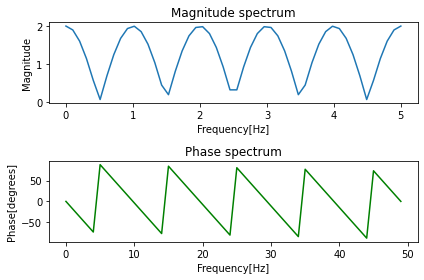

In [ ]:
##### Frequency Plots####
f = np.linspace(0,5,50)
tf5 = 1 + np.e**(-1j*2*np.pi*f)
plt.subplot(211)
plt.plot(f,abs(tf5))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.angle(tf5)*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

*On giving a sinusoidal input to the  filter---->>*

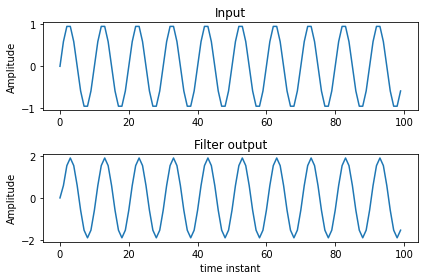

In [ ]:
t = np.arange(100)      
sine = np.sin(2 * np.pi * 0.1 * t)         ### Sine wave of 0.1 Hz sampled at 1 Hz
plt.subplot(211)
plt.plot(t,sine)
plt.title('Input')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(t,boxcar(sine))
plt.xlabel('time instant')
plt.ylabel('Amplitude')
plt.title('Filter output')
plt.tight_layout()
plt.show()

***Second filter given is the Moving average Filter***

**y[n] = (x[n] + x[n-1] + x[n-2])*1/3**

Transfer function : 


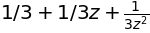

In [ ]:
print('Transfer function : ')
H5 = (1 + z**(-1) + z**(-2))/3
display(H5)

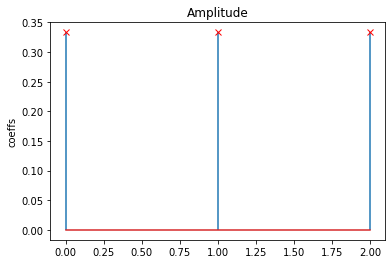

In [ ]:
######## Amplitude plot##
coeff = [1/3,1/3,1/3]
plt.stem(coeff,use_line_collection= True,markerfmt='rx')
plt.ylabel('coeffs')
plt.title('Amplitude')
plt.show()

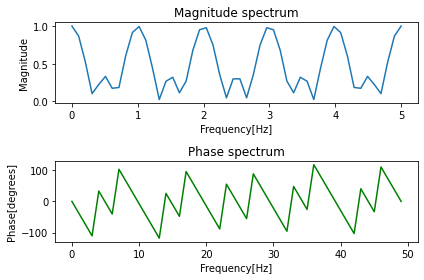

In [ ]:
##### Frequency Plots####
f = np.linspace(0,5,50)
tf6 = 1/3*(1 + np.e**(-1j*2*np.pi*f) + np.e**(-1j*4*np.pi*f))
plt.subplot(211)
plt.plot(f,abs(tf6))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.unwrap(np.angle(tf6))*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

*Moving average filter is a low pass filter that is very often used for removing high frequency noise*

***A little modification--->*** 
*This new filter is called Hanning filter*

**y[n] = (x[n] + 2*x[n-1] + x[n-2])1/4**

Transfer function : 


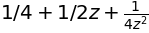

In [ ]:
print('Transfer function : ')
H5 = (1 + 2*z**(-1) + z**(-2))/4
display(H5)

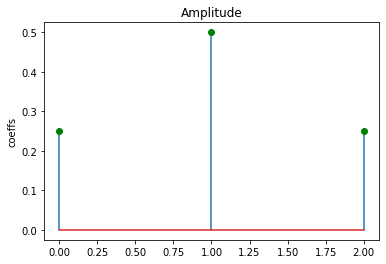

In [ ]:
######## Amplitude plot##
coeff = [0.25,0.5,0.25]
plt.stem(coeff,use_line_collection= True,markerfmt='go')
plt.ylabel('coeffs')
plt.title('Amplitude')
plt.show()

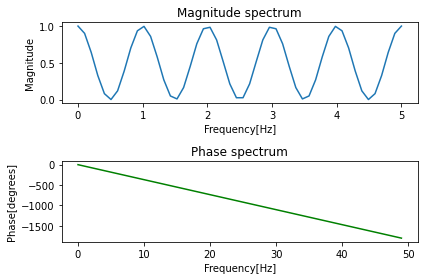

In [ ]:
##### Frequency Plots####
f = np.linspace(0,5,50)
tf7 = 1/4*(1 + 2*np.e**(-1j*2*np.pi*f) + np.e**(-1j*4*np.pi*f))
plt.subplot(211)
plt.plot(f,abs(tf7))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.unwrap(np.angle(tf7))*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

***IMAGE PROCESSING***

ORIGINAL IMAGE


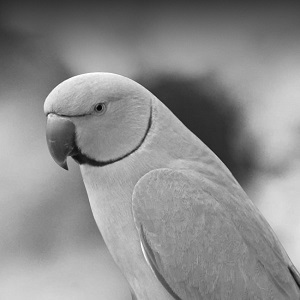

In [18]:
######Mean and Median filtering#####
import cv2
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
path = r'/content/sample_data/sampleimage.jpg'
image = cv2.imread(path,0)
print('ORIGINAL IMAGE')
cv2_imshow(image)

***Adding Speckle Noise and 'S & P' Noise***

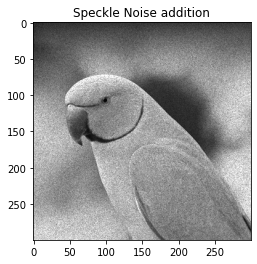

In [26]:
noisyspeckle = random_noise(image,mode = 'speckle')
plt.imshow(noisyspeckle)
plt.gray()
plt.title('Speckle Noise addition')
plt.show()

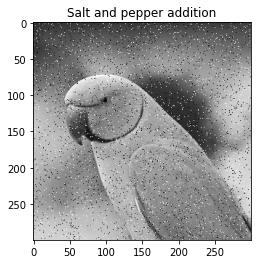

In [29]:
noisysalt_Pepp = random_noise(image,mode = 's&p')
plt.imshow(noisyspeckle)
plt.gray()
plt.title('Salt and pepper addition')
plt.show()

***NOISE FILTERING***

MEAN FILTERING

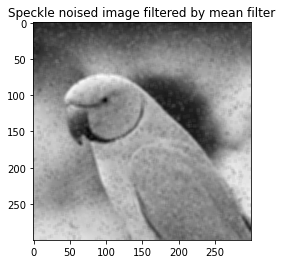

In [31]:
speckle_mean_filtered = cv2.blur(noisyspeckle,(5,5))    #### considering 5x5 window
plt.imshow(speckle_mean_filtered)
plt.gray()
plt.title('Speckle noised image filtered by mean filter')
plt.show()

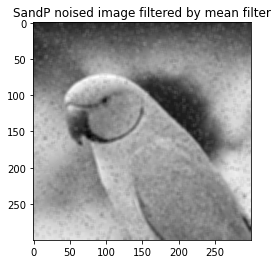

In [35]:
SandP_mean_filtered = cv2.blur(noisysalt_Pepp,(5,5))  #### considering 5x5 window
plt.imshow(SandP_mean_filtered)
plt.gray()
plt.title('SandP noised image filtered by mean filter')
plt.show()

MEDIAN FILTERING

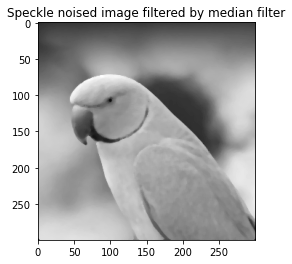

In [40]:
from scipy.signal import medfilt2d
speckle_median_filtered = medfilt2d(noisyspeckle,(5,5))    #### considering 5x5 window
plt.imshow(speckle_median_filtered,cmap = 'gray')
plt.title('Speckle noised image filtered by median filter')
plt.show()

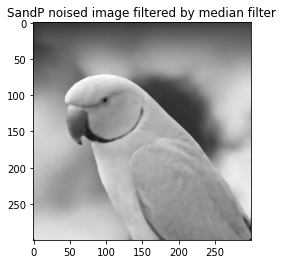

In [41]:
SandP_median_filtered = medfilt2d(noisysalt_Pepp,(5,5))    #### considering 5x5 window
plt.imshow(SandP_median_filtered,cmap = 'gray')
plt.title('SandP noised image filtered by median filter')
plt.show()

*Mean filter averages all the pixels under the window whereas the median fiter finds the median under the window. By averaing edges are lost whereas median filter preserves the edges*

***ANALOG TO DIGITAL FILTER CONVERSION***

*In order to ddo so billinear transformation is applied*

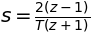

In [47]:
s,T,z,w = sp.symbols('s T z w')
bilt = sp.Eq(s,(2/T)*(z-1)/(z+1))
display(bilt)

***Digital Low pass filter***

In [55]:
T = 0.001
x = H.subs(s,(2/T)*(z-1)/(z+1))
print('The discrete transfer function of low pass filter is given by :')
x.simplify()

The discrete transfer function of low pass filter is given by :


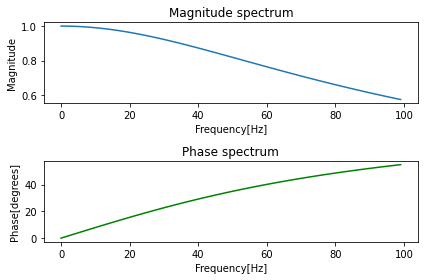

In [58]:
f = np.arange(100)
z1 = np.e**(-1j*2*np.pi*f*T)        #### z = -jwT
Dis_tf = (z1+1)/(5.418*z1-3.418)
plt.subplot(211)
plt.plot(f,abs(Dis_tf))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.unwrap(np.angle(Dis_tf))*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

***Digital High pass filter***

The discrete transfer function of high pass filter is given by :


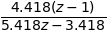

In [60]:
T = 0.001
x = H2.subs(s,(2/T)*(z-1)/(z+1))
print('The discrete transfer function of high pass filter is given by :')
x.simplify()

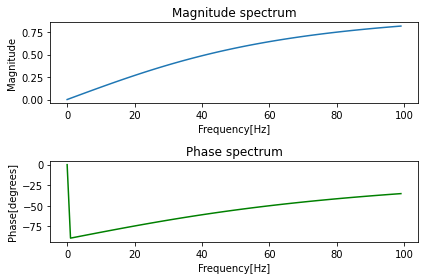

In [61]:
Dis_tf = 4.418*(z1-1)/(5.418*z1-3.418)
plt.subplot(211)
plt.plot(f,abs(Dis_tf))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.unwrap(np.angle(Dis_tf))*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()

***Second order Digital Low pass fiter***

The discrete transfer function of second order Low pass filter is given by :


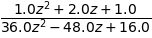

In [63]:
T = 0.001
x = H3.subs(s,(2/T)*(z-1)/(z+1))
print('The discrete transfer function of second order Low pass filter is given by :')
x.simplify()

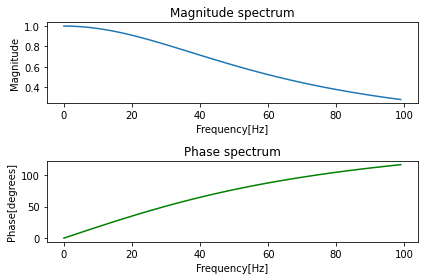

In [65]:
Dis_tf = (z1**2 + 2*z1 + 1)/(36*z1**2-48*z1+16)
plt.subplot(211)
plt.plot(f,abs(Dis_tf))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(np.unwrap(np.angle(Dis_tf))*180/np.pi,c='g')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Phase[degrees]')
plt.title('Phase spectrum')
plt.tight_layout()
plt.show()